In [1]:
'''
CS 418: Final Project
Title - US Census Demographic Data - DATA PROCESSING
Authors: Anusha Sagi, Fatima Kahack, Lydia Tse
Description: The following is code to analyze the US Census Data and preprocess it.
'''

'\nCS 418: Final Project\nTitle - US Census Demographic Data - DATA PROCESSING\nAuthors: Anusha Sagi, Fatima Kahack, Lydia Tse\nDescription: The following is code to analyze the US Census Data and preprocess it.\n'

In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load US Census Demographic Data
census_data = pd.read_csv('census_train_data.csv')
census_data.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
3,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
4,1011,Alabama,Bullock County,10478,5616,4862,0.3,21.6,75.6,1.0,...,6.2,1.7,3.0,29.8,4290,81.4,13.6,5.0,0.0,12.1


In [4]:
#no.of variables
census_data.shape

(2427, 37)

In [5]:
#type of variables
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 37 columns):
CountyId            2427 non-null int64
State               2427 non-null object
County              2427 non-null object
TotalPop            2427 non-null int64
Men                 2427 non-null int64
Women               2427 non-null int64
Hispanic            2427 non-null float64
White               2427 non-null float64
Black               2427 non-null float64
Native              2427 non-null float64
Asian               2427 non-null float64
Pacific             2427 non-null float64
VotingAgeCitizen    2427 non-null int64
Income              2427 non-null int64
IncomeErr           2427 non-null int64
IncomePerCap        2427 non-null int64
IncomePerCapErr     2427 non-null int64
Poverty             2427 non-null float64
ChildPoverty        2426 non-null float64
Professional        2427 non-null float64
Service             2427 non-null float64
Office              2427 non-nu

In [6]:
#Irrelevant & Redundant attributes
census_data = census_data.drop(['IncomeErr', 'IncomePerCapErr'], axis=1)
census_data.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
3,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
4,1011,Alabama,Bullock County,10478,5616,4862,0.3,21.6,75.6,1.0,...,6.2,1.7,3.0,29.8,4290,81.4,13.6,5.0,0.0,12.1


In [7]:
# Count missing values
num_rows = census_data.shape[0]
print(num_rows - census_data.count())

CountyId            0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomePerCap        0
Poverty             0
ChildPoverty        1
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64


In [8]:
#Fill the NA value in 'ChildPoverty' column to 0
census_data['ChildPoverty'] = census_data['ChildPoverty'].fillna(0)

In [9]:
#Convert men & women columns to percent women
census_data['TotalPop'] = census_data['TotalPop'].astype(float)
census_data['Women'] = census_data['Women'].astype(float)

In [10]:
census_data['Percent_Women'] = (census_data['Women'] / census_data['TotalPop']) *100
census_data.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Percent_Women
0,1001,Alabama,Autauga County,55036.0,26899,28137.0,2.7,75.4,18.9,0.3,...,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,51.124718
1,1003,Alabama,Baldwin County,203360.0,99527,103833.0,4.4,83.1,9.5,0.8,...,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,51.058714
2,1007,Alabama,Bibb County,22580.0,12251,10329.0,2.4,74.6,22.0,0.4,...,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,45.744021
3,1009,Alabama,Blount County,57667.0,28490,29177.0,9.0,87.4,1.5,0.3,...,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,50.595661
4,1011,Alabama,Bullock County,10478.0,5616,4862.0,0.3,21.6,75.6,1.0,...,1.7,3.0,29.8,4290,81.4,13.6,5.0,0.0,12.1,46.401985


In [11]:
#drop men & women columns
census_data = census_data.drop(['Men', 'Women'], axis=1)
census_data.head()

,CountyId,State,County,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Percent_Women
0,1001,Alabama,Autauga County,55036.0,2.7,75.4,18.9,0.3,0.9,0.0,...,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,51.124718
1,1003,Alabama,Baldwin County,203360.0,4.4,83.1,9.5,0.8,0.7,0.0,...,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,51.058714
2,1007,Alabama,Bibb County,22580.0,2.4,74.6,22.0,0.4,0.0,0.0,...,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,45.744021
3,1009,Alabama,Blount County,57667.0,9.0,87.4,1.5,0.3,0.1,0.0,...,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,50.595661
4,1011,Alabama,Bullock County,10478.0,0.3,21.6,75.6,1.0,0.7,0.0,...,1.7,3.0,29.8,4290,81.4,13.6,5.0,0.0,12.1,46.401985


In [12]:
#drop % Pacific - lot of zeros(Other related columns have necessary data)
census_data = census_data.drop(['Pacific'], axis=1)
census_data.head()

,CountyId,State,County,TotalPop,Hispanic,White,Black,Native,Asian,VotingAgeCitizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Percent_Women
0,1001,Alabama,Autauga County,55036.0,2.7,75.4,18.9,0.3,0.9,41016,...,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,51.124718
1,1003,Alabama,Baldwin County,203360.0,4.4,83.1,9.5,0.8,0.7,155376,...,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,51.058714
2,1007,Alabama,Bibb County,22580.0,2.4,74.6,22.0,0.4,0.0,17662,...,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,45.744021
3,1009,Alabama,Blount County,57667.0,9.0,87.4,1.5,0.3,0.1,42513,...,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,50.595661
4,1011,Alabama,Bullock County,10478.0,0.3,21.6,75.6,1.0,0.7,8212,...,1.7,3.0,29.8,4290,81.4,13.6,5.0,0.0,12.1,46.401985


In [13]:
#drop Transit & FamilyWork - lot of zeros(Other related columns have necessary data)
census_data = census_data.drop(['Transit', 'FamilyWork'], axis=1)
census_data.head()

,CountyId,State,County,TotalPop,Hispanic,White,Black,Native,Asian,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,Unemployment,Percent_Women
0,1001,Alabama,Autauga County,55036.0,2.7,75.4,18.9,0.3,0.9,41016,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,5.2,51.124718
1,1003,Alabama,Baldwin County,203360.0,4.4,83.1,9.5,0.8,0.7,155376,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,5.5,51.058714
2,1007,Alabama,Bibb County,22580.0,2.4,74.6,22.0,0.4,0.0,17662,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,8.2,45.744021
3,1009,Alabama,Blount County,57667.0,9.0,87.4,1.5,0.3,0.1,42513,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,4.9,50.595661
4,1011,Alabama,Bullock County,10478.0,0.3,21.6,75.6,1.0,0.7,8212,...,6.2,1.7,3.0,29.8,4290,81.4,13.6,5.0,12.1,46.401985


In [14]:
#drop Employed column - redundant (We have unemployed %)
census_data = census_data.drop(['Employed'], axis=1)
census_data.head()

,CountyId,State,County,TotalPop,Hispanic,White,Black,Native,Asian,VotingAgeCitizen,...,Carpool,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Percent_Women
0,1001,Alabama,Autauga County,55036.0,2.7,75.4,18.9,0.3,0.9,41016,...,9.6,0.6,1.3,2.5,25.8,74.1,20.2,5.6,5.2,51.124718
1,1003,Alabama,Baldwin County,203360.0,4.4,83.1,9.5,0.8,0.7,155376,...,7.6,0.8,1.1,5.6,27.0,80.7,12.9,6.3,5.5,51.058714
2,1007,Alabama,Bibb County,22580.0,2.4,74.6,22.0,0.4,0.0,17662,...,9.5,0.3,1.7,1.5,30.0,76.0,17.4,6.3,8.2,45.744021
3,1009,Alabama,Blount County,57667.0,9.0,87.4,1.5,0.3,0.1,42513,...,10.2,0.4,0.4,2.1,35.0,83.9,11.9,4.0,4.9,50.595661
4,1011,Alabama,Bullock County,10478.0,0.3,21.6,75.6,1.0,0.7,8212,...,15.7,6.2,1.7,3.0,29.8,81.4,13.6,5.0,12.1,46.401985


In [15]:
poverty_mean = census_data['Poverty'].mean()
poverty_median = census_data['Poverty'].median()
print(poverty_mean)
print(poverty_median)

16.691100123609427
15.3


In [16]:
childPoverty_mean = census_data['ChildPoverty'].mean()
childPoverty_median = census_data['ChildPoverty'].median()
print(childPoverty_mean)
print(childPoverty_median)

22.929666254635404
21.3


In [17]:
# Calculate Poverty category variable
census_data['Poverty Category'] = np.where(census_data['Poverty']>poverty_mean, '1', '0')
census_data.head()

,CountyId,State,County,TotalPop,Hispanic,White,Black,Native,Asian,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Percent_Women,Poverty Category
0,1001,Alabama,Autauga County,55036.0,2.7,75.4,18.9,0.3,0.9,41016,...,0.6,1.3,2.5,25.8,74.1,20.2,5.6,5.2,51.124718,0
1,1003,Alabama,Baldwin County,203360.0,4.4,83.1,9.5,0.8,0.7,155376,...,0.8,1.1,5.6,27.0,80.7,12.9,6.3,5.5,51.058714,0
2,1007,Alabama,Bibb County,22580.0,2.4,74.6,22.0,0.4,0.0,17662,...,0.3,1.7,1.5,30.0,76.0,17.4,6.3,8.2,45.744021,0
3,1009,Alabama,Blount County,57667.0,9.0,87.4,1.5,0.3,0.1,42513,...,0.4,0.4,2.1,35.0,83.9,11.9,4.0,4.9,50.595661,0
4,1011,Alabama,Bullock County,10478.0,0.3,21.6,75.6,1.0,0.7,8212,...,6.2,1.7,3.0,29.8,81.4,13.6,5.0,12.1,46.401985,1


In [18]:
# Calculate Child Poverty category variable
census_data['Child_Poverty Category'] = np.where(census_data['ChildPoverty']>childPoverty_mean, '1', '0')
census_data.head()

,CountyId,State,County,TotalPop,Hispanic,White,Black,Native,Asian,VotingAgeCitizen,...,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Percent_Women,Poverty Category,Child_Poverty Category
0,1001,Alabama,Autauga County,55036.0,2.7,75.4,18.9,0.3,0.9,41016,...,1.3,2.5,25.8,74.1,20.2,5.6,5.2,51.124718,0,0
1,1003,Alabama,Baldwin County,203360.0,4.4,83.1,9.5,0.8,0.7,155376,...,1.1,5.6,27.0,80.7,12.9,6.3,5.5,51.058714,0,0
2,1007,Alabama,Bibb County,22580.0,2.4,74.6,22.0,0.4,0.0,17662,...,1.7,1.5,30.0,76.0,17.4,6.3,8.2,45.744021,0,1
3,1009,Alabama,Blount County,57667.0,9.0,87.4,1.5,0.3,0.1,42513,...,0.4,2.1,35.0,83.9,11.9,4.0,4.9,50.595661,0,1
4,1011,Alabama,Bullock County,10478.0,0.3,21.6,75.6,1.0,0.7,8212,...,1.7,3.0,29.8,81.4,13.6,5.0,12.1,46.401985,1,1


In [19]:
#type of variables
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 32 columns):
CountyId                  2427 non-null int64
State                     2427 non-null object
County                    2427 non-null object
TotalPop                  2427 non-null float64
Hispanic                  2427 non-null float64
White                     2427 non-null float64
Black                     2427 non-null float64
Native                    2427 non-null float64
Asian                     2427 non-null float64
VotingAgeCitizen          2427 non-null int64
Income                    2427 non-null int64
IncomePerCap              2427 non-null int64
Poverty                   2427 non-null float64
ChildPoverty              2427 non-null float64
Professional              2427 non-null float64
Service                   2427 non-null float64
Office                    2427 non-null float64
Construction              2427 non-null float64
Production                2427 non-null

In [20]:
#Arranging columns
census_data = census_data[['CountyId', 'State', 'County', 'TotalPop', 'Percent_Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'VotingAgeCitizen', 'Income', 'IncomePerCap', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'Unemployment', 'Poverty', 'ChildPoverty', 'Poverty Category', 'Child_Poverty Category']]
census_data.head()

,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,Native,Asian,...,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Poverty,ChildPoverty,Poverty Category,Child_Poverty Category
0,1001,Alabama,Autauga County,55036.0,51.124718,2.7,75.4,18.9,0.3,0.9,...,2.5,25.8,74.1,20.2,5.6,5.2,13.7,20.1,0,0
1,1003,Alabama,Baldwin County,203360.0,51.058714,4.4,83.1,9.5,0.8,0.7,...,5.6,27.0,80.7,12.9,6.3,5.5,11.8,16.1,0,0
2,1007,Alabama,Bibb County,22580.0,45.744021,2.4,74.6,22.0,0.4,0.0,...,1.5,30.0,76.0,17.4,6.3,8.2,15.2,26.6,0,1
3,1009,Alabama,Blount County,57667.0,50.595661,9.0,87.4,1.5,0.3,0.1,...,2.1,35.0,83.9,11.9,4.0,4.9,15.6,25.4,0,1
4,1011,Alabama,Bullock County,10478.0,46.401985,0.3,21.6,75.6,1.0,0.7,...,3.0,29.8,81.4,13.6,5.0,12.1,28.5,50.4,1,1


In [21]:
#Descriptive Statistics
census_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CountyId,2427.0,31584.119489,16286.815957,1001.000000,19046.000000,30059.000000,47018.000000,7.215300e+04
TotalPop,2427.0,100277.147507,338543.745227,74.000000,11264.000000,25625.000000,66275.000000,1.010572e+07
Percent_Women,2427.0,49.997184,2.338260,19.166215,49.495212,50.432776,51.144426,5.663391e+01
Hispanic,2427.0,11.403296,19.532931,0.000000,2.100000,4.100000,9.900000,9.990000e+01
White,2427.0,74.983890,23.100311,0.000000,63.450000,83.800000,92.800000,1.000000e+02
Black,2427.0,8.547796,14.205141,0.000000,0.500000,1.900000,8.950000,8.690000e+01
Native,2427.0,1.732674,7.250648,0.000000,0.100000,0.300000,0.600000,9.030000e+01
Asian,2427.0,1.282118,2.628246,0.000000,0.200000,0.600000,1.200000,4.180000e+01
VotingAgeCitizen,2427.0,70967.882159,218772.977868,59.000000,8524.000000,19425.000000,50359.000000,6.218279e+06
Income,2427.0,49057.969922,13641.123656,11680.000000,40893.000000,47873.000000,55613.000000,1.175150e+05


In [22]:
df_race_melt = census_data.melt(id_vars = 'Poverty Category',
                  value_vars = ['Hispanic',
                                'White',
                                'Black',
                                'Native',
                                'Asian'],
                  var_name = 'columns')

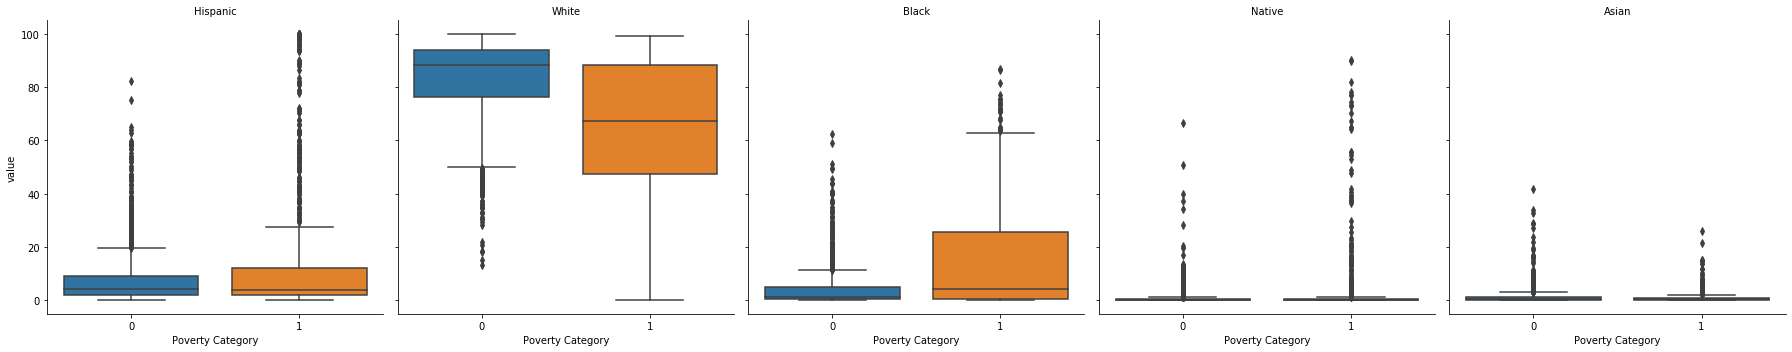

In [23]:
a = sns.catplot(data = df_race_melt,
                   x = 'Poverty Category',
                   y = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['Hispanic', #order of boxplots
                                'White',
                                'Black',
                                'Native',
                                'Asian']).set_titles('{col_name}') # remove 'column = ' part of title
plt.show()

In [24]:
df_occp_melt = census_data.melt(id_vars = 'Poverty Category',
                  value_vars = ['Professional',
                                'Service',
                                'Office',
                                'Construction',
                                'Production'],
                  var_name = 'columns')

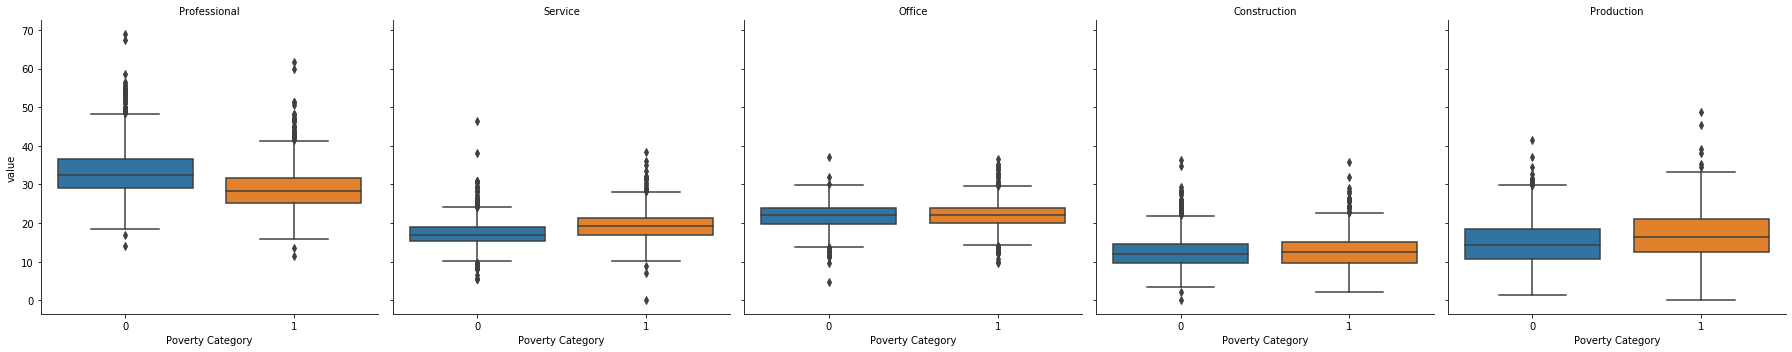

In [25]:
a = sns.catplot(data = df_occp_melt,
                   x = 'Poverty Category',
                   y = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['Professional', #order of boxplots
                                'Service',
                                'Office',
                                'Construction',
                                'Production']).set_titles('{col_name}') # remove 'column = ' part of title
plt.show()

In [26]:
df_trans_melt = census_data.melt(id_vars = 'Poverty Category',
                  value_vars = ['Drive',
                                'Carpool',
                                'Walk',
                                'OtherTransp',
                                'WorkAtHome'],
                  var_name = 'columns')

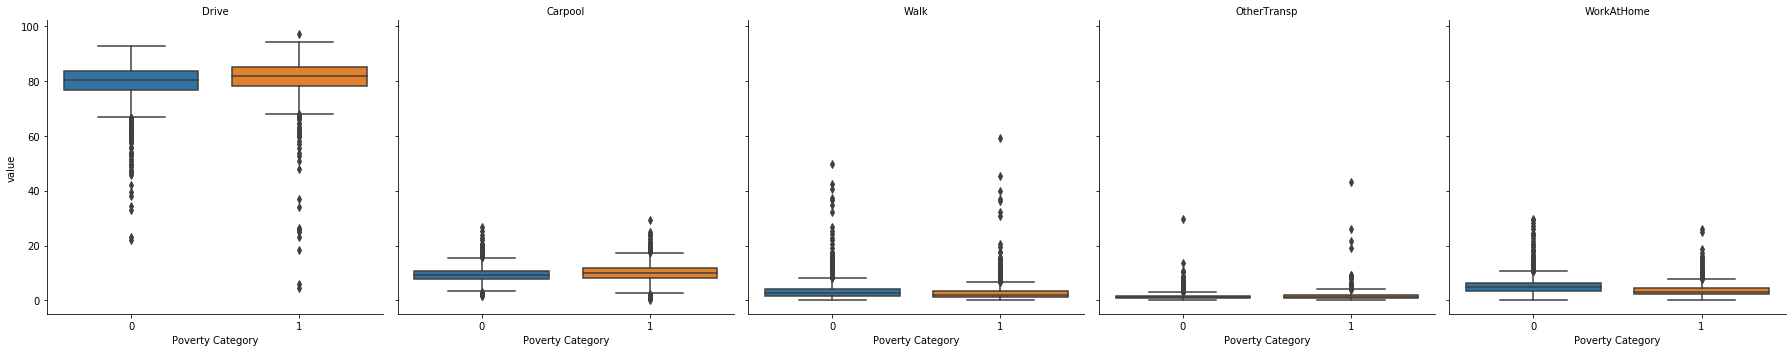

In [27]:
a = sns.catplot(data = df_trans_melt,
                   x = 'Poverty Category',
                   y = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['Drive', #order of boxplots
                                'Carpool',
                                'Walk',
                                'OtherTransp',
                                'WorkAtHome']).set_titles('{col_name}') # remove 'column = ' part of title
plt.show()

In [28]:
df_work_melt = census_data.melt(id_vars = 'Poverty Category',
                  value_vars = ['PrivateWork',
                                'PublicWork',
                                'SelfEmployed'],
                  var_name = 'columns')

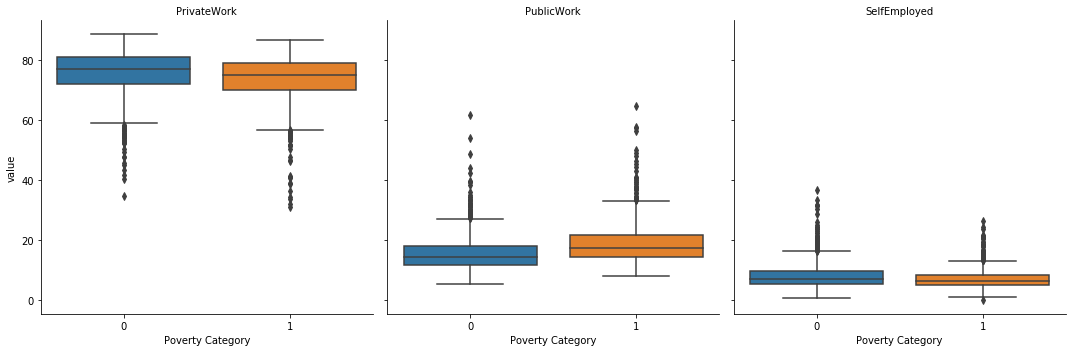

In [33]:
a = sns.catplot(data = df_work_melt,
                   x = 'Poverty Category',
                   y = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['PrivateWork', #order of boxplots
                                'PublicWork',
                                'SelfEmployed']).set_titles('{col_name}') # remove 'column = ' part of title
plt.show()

In [34]:
df_factors_melt = census_data.melt(id_vars = 'Poverty Category',
                  value_vars = ['Percent_Women',
                                'Unemployment'],
                  var_name = 'columns')

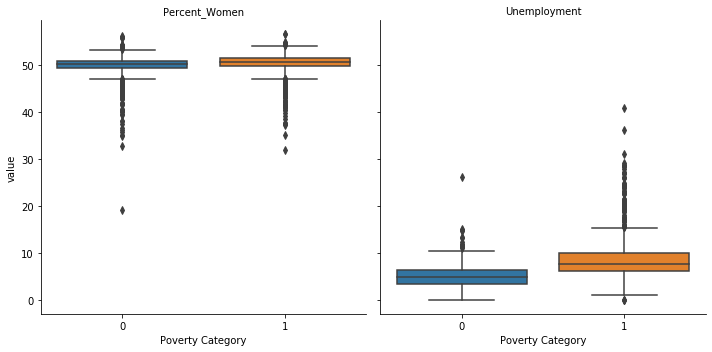

In [35]:
a = sns.catplot(data = df_factors_melt,
                   x = 'Poverty Category',
                   y = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['Percent_Women', #order of boxplots
                                'Unemployment']).set_titles('{col_name}') # remove 'column = ' part of title
plt.show()

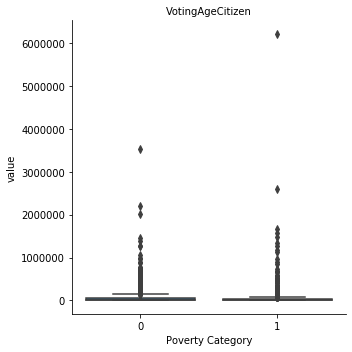

In [36]:
df_citizen_melt = census_data.melt(id_vars = 'Poverty Category',
                  value_vars = ['VotingAgeCitizen'],
                  var_name = 'columns')
a = sns.catplot(data = df_citizen_melt,
                   x = 'Poverty Category',
                   y = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['VotingAgeCitizen']).set_titles('{col_name}') # remove 'column = ' part of title
plt.show()

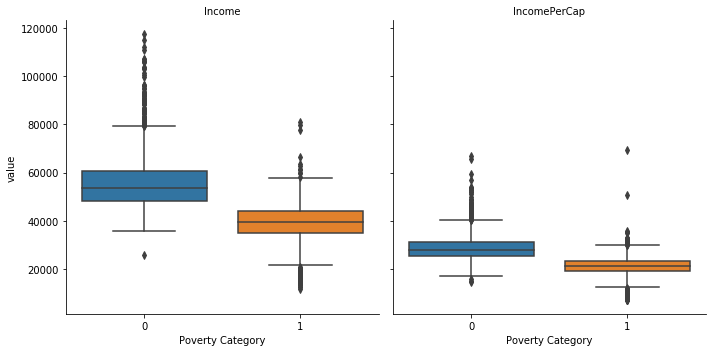

In [37]:
df_income_melt = census_data.melt(id_vars = 'Poverty Category',
                  value_vars = ['Income',
                               'IncomePerCap'],
                  var_name = 'columns')
a = sns.catplot(data = df_income_melt,
                   x = 'Poverty Category',
                   y = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['Income',
                               'IncomePerCap']).set_titles('{col_name}') # remove 'column = ' part of title
plt.show()

In [38]:
#drop Native, Asian - Not important
census_data = census_data.drop(['Native', 'Asian'], axis=1)
census_data.head()

,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,VotingAgeCitizen,Income,...,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Poverty,ChildPoverty,Poverty Category,Child_Poverty Category
0,1001,Alabama,Autauga County,55036.0,51.124718,2.7,75.4,18.9,41016,55317,...,2.5,25.8,74.1,20.2,5.6,5.2,13.7,20.1,0,0
1,1003,Alabama,Baldwin County,203360.0,51.058714,4.4,83.1,9.5,155376,52562,...,5.6,27.0,80.7,12.9,6.3,5.5,11.8,16.1,0,0
2,1007,Alabama,Bibb County,22580.0,45.744021,2.4,74.6,22.0,17662,43404,...,1.5,30.0,76.0,17.4,6.3,8.2,15.2,26.6,0,1
3,1009,Alabama,Blount County,57667.0,50.595661,9.0,87.4,1.5,42513,47412,...,2.1,35.0,83.9,11.9,4.0,4.9,15.6,25.4,0,1
4,1011,Alabama,Bullock County,10478.0,46.401985,0.3,21.6,75.6,8212,29655,...,3.0,29.8,81.4,13.6,5.0,12.1,28.5,50.4,1,1


In [39]:
#drop Office, Construction - Not important
census_data = census_data.drop(['Office', 'Construction'], axis=1)
census_data.head()

,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,VotingAgeCitizen,Income,...,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Poverty,ChildPoverty,Poverty Category,Child_Poverty Category
0,1001,Alabama,Autauga County,55036.0,51.124718,2.7,75.4,18.9,41016,55317,...,2.5,25.8,74.1,20.2,5.6,5.2,13.7,20.1,0,0
1,1003,Alabama,Baldwin County,203360.0,51.058714,4.4,83.1,9.5,155376,52562,...,5.6,27.0,80.7,12.9,6.3,5.5,11.8,16.1,0,0
2,1007,Alabama,Bibb County,22580.0,45.744021,2.4,74.6,22.0,17662,43404,...,1.5,30.0,76.0,17.4,6.3,8.2,15.2,26.6,0,1
3,1009,Alabama,Blount County,57667.0,50.595661,9.0,87.4,1.5,42513,47412,...,2.1,35.0,83.9,11.9,4.0,4.9,15.6,25.4,0,1
4,1011,Alabama,Bullock County,10478.0,46.401985,0.3,21.6,75.6,8212,29655,...,3.0,29.8,81.4,13.6,5.0,12.1,28.5,50.4,1,1


In [40]:
#drop Drive, Walk, OtherTransp - Not important
census_data = census_data.drop(['Drive', 'Walk', 'OtherTransp'], axis=1)
census_data.head()

,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,VotingAgeCitizen,Income,...,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Poverty,ChildPoverty,Poverty Category,Child_Poverty Category
0,1001,Alabama,Autauga County,55036.0,51.124718,2.7,75.4,18.9,41016,55317,...,2.5,25.8,74.1,20.2,5.6,5.2,13.7,20.1,0,0
1,1003,Alabama,Baldwin County,203360.0,51.058714,4.4,83.1,9.5,155376,52562,...,5.6,27.0,80.7,12.9,6.3,5.5,11.8,16.1,0,0
2,1007,Alabama,Bibb County,22580.0,45.744021,2.4,74.6,22.0,17662,43404,...,1.5,30.0,76.0,17.4,6.3,8.2,15.2,26.6,0,1
3,1009,Alabama,Blount County,57667.0,50.595661,9.0,87.4,1.5,42513,47412,...,2.1,35.0,83.9,11.9,4.0,4.9,15.6,25.4,0,1
4,1011,Alabama,Bullock County,10478.0,46.401985,0.3,21.6,75.6,8212,29655,...,3.0,29.8,81.4,13.6,5.0,12.1,28.5,50.4,1,1


In [41]:
#drop VotingAgeCitizen- Not important
census_data = census_data.drop(['VotingAgeCitizen'], axis=1)
census_data.head()

,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,Income,IncomePerCap,...,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Poverty,ChildPoverty,Poverty Category,Child_Poverty Category
0,1001,Alabama,Autauga County,55036.0,51.124718,2.7,75.4,18.9,55317,27824,...,2.5,25.8,74.1,20.2,5.6,5.2,13.7,20.1,0,0
1,1003,Alabama,Baldwin County,203360.0,51.058714,4.4,83.1,9.5,52562,29364,...,5.6,27.0,80.7,12.9,6.3,5.5,11.8,16.1,0,0
2,1007,Alabama,Bibb County,22580.0,45.744021,2.4,74.6,22.0,43404,20911,...,1.5,30.0,76.0,17.4,6.3,8.2,15.2,26.6,0,1
3,1009,Alabama,Blount County,57667.0,50.595661,9.0,87.4,1.5,47412,22021,...,2.1,35.0,83.9,11.9,4.0,4.9,15.6,25.4,0,1
4,1011,Alabama,Bullock County,10478.0,46.401985,0.3,21.6,75.6,29655,20856,...,3.0,29.8,81.4,13.6,5.0,12.1,28.5,50.4,1,1


In [42]:
#Inter-quartile range for data
Q1 = census_data.quantile(0.25)
Q3 = census_data.quantile(0.75)
IQR = Q3 - Q1

In [43]:
#Information about outliers for each column
((census_data < (Q1 - 1.5 * IQR)) | (census_data > (Q3 + 1.5 * IQR))).sum()

Black                     341
Carpool                   108
ChildPoverty               83
Child_Poverty Category      0
County                      0
CountyId                    0
Hispanic                  319
Income                    131
IncomePerCap              112
MeanCommute                36
Percent_Women             215
Poverty                   100
Poverty Category            0
PrivateWork                72
Production                 14
Professional               76
PublicWork                 82
SelfEmployed              118
Service                    71
State                       0
TotalPop                  326
Unemployment              112
White                      97
WorkAtHome                122
dtype: int64

In [44]:
census_data.to_csv("train_dp_output.csv")
census_data

,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,Income,IncomePerCap,...,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Poverty,ChildPoverty,Poverty Category,Child_Poverty Category
0,1001,Alabama,Autauga County,55036.0,51.124718,2.7,75.4,18.9,55317,27824,...,2.5,25.8,74.1,20.2,5.6,5.2,13.7,20.1,0,0
1,1003,Alabama,Baldwin County,203360.0,51.058714,4.4,83.1,9.5,52562,29364,...,5.6,27.0,80.7,12.9,6.3,5.5,11.8,16.1,0,0
2,1007,Alabama,Bibb County,22580.0,45.744021,2.4,74.6,22.0,43404,20911,...,1.5,30.0,76.0,17.4,6.3,8.2,15.2,26.6,0,1
3,1009,Alabama,Blount County,57667.0,50.595661,9.0,87.4,1.5,47412,22021,...,2.1,35.0,83.9,11.9,4.0,4.9,15.6,25.4,0,1
4,1011,Alabama,Bullock County,10478.0,46.401985,0.3,21.6,75.6,29655,20856,...,3.0,29.8,81.4,13.6,5.0,12.1,28.5,50.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,72143,Puerto Rico,Vega Alta Municipio,38589.0,52.393169,98.6,0.9,0.0,18053,10492,...,1.8,33.9,77.0,18.4,4.6,21.5,50.6,64.3,1,1
2423,72145,Puerto Rico,Vega Baja Municipio,54754.0,52.023596,96.7,3.1,0.1,18900,10197,...,0.9,31.6,76.2,19.3,4.3,16.8,43.8,49.4,1,1
2424,72147,Puerto Rico,Vieques Municipio,8931.0,51.282051,95.7,4.0,0.0,16261,11136,...,1.7,14.9,40.7,40.9,18.4,12.8,36.8,68.2,1,1
2425,72149,Puerto Rico,Villalba Municipio,23659.0,51.350437,99.7,0.2,0.1,19893,10449,...,2.8,28.4,59.2,30.2,10.4,24.8,50.0,67.9,1,1
